# Instanton Calculation for Muller Brown Potential
----
Purpose: reproduce the results in "Path Integral Methods in Quantum Rate Theories"


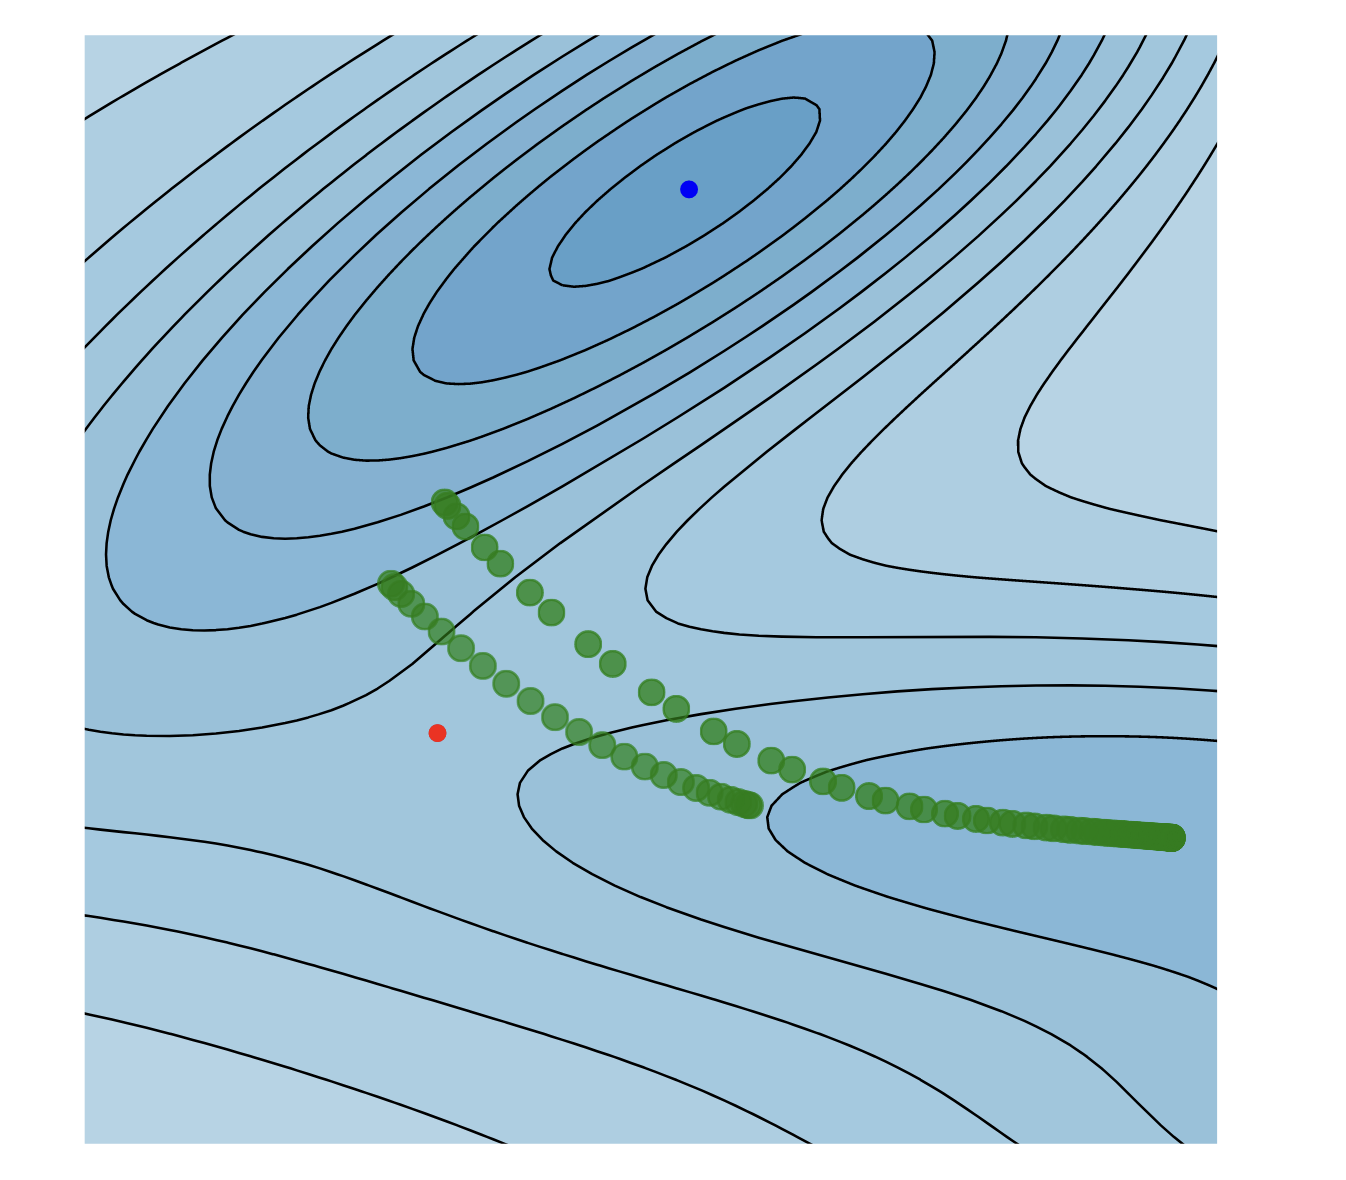

## 1. Muller Brown Potential
---

Prepare potential function

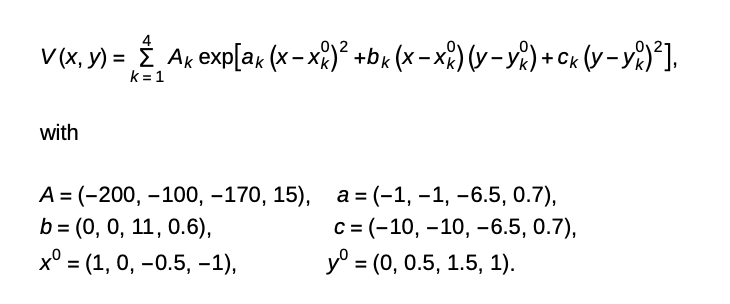

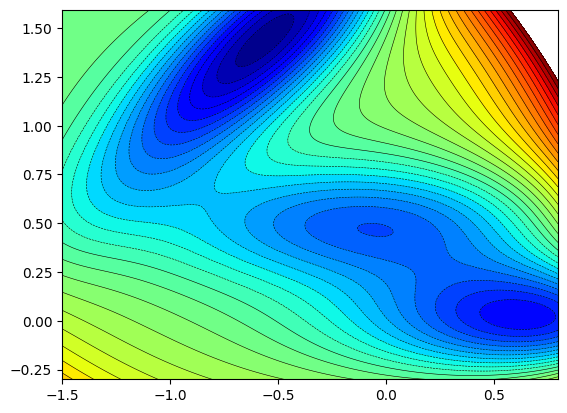

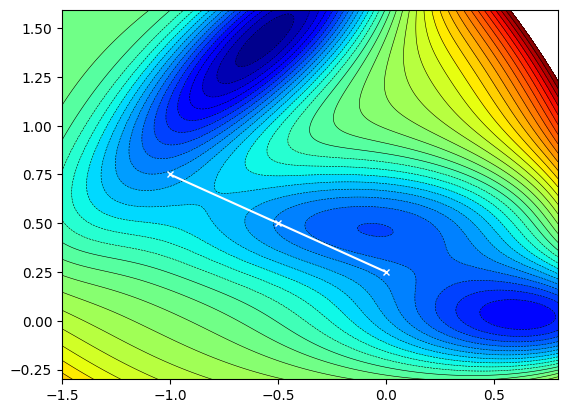

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class MullerBrownPotential :

    def __init__( self, A  = np.array([-200, -100, -170, 15]),
                        a  = np.array([-1, -1, -6.5, 0.7])   ,
                        b  = np.array([0, 0, 11, 0.6])       ,
                        c  = np.array([-10, -10, -6.5, 0.7]) ,
                        x0 = np.array([1, 0, -0.5, -1])     ,
                        y0 = np.array([0, 0.5, 1.5, 1]) ) :
        
        self.A  = A 
        self.a  = a 
        self.b  = b 
        self.c  = c 
        self.x0 = x0
        self.y0 = y0

    def potential(self, _x) :

        ene = 0.0

        x = _x.T[0]
        y = _x.T[1]

        for i in range( 4 ) :

            #ene += self.A[i]*np.exp(self.a[i]*(x - self.x0[i])**2.0 + 
            #                        self.b[i]*(x - self.x0[i])*(y - self.y0[i]) + 
            #                        self.c[i]*(y - self.y0[i])**2.0 )
            ene += self.A[i]*self._exp_term(x, y, i )

        return ene

    def gradient(self, _x ) :

        x = _x[0]
        y = _x[1]

        grad = np.zeros(_x.shape, dtype=float )

        for i in range(4) :

            grad[0] += self.A[i]*self._exp_term(x,y,i)*\
                       (2*self.a[i]*(x-self.x0[i]) + self.b[i]*(y-self.y0[i]))
            grad[1] += self.A[i]*self._exp_term(x,y,i)*\
                       (2*self.c[i]*(y-self.y0[i]) + self.b[i]*(x-self.x0[i]))
                       

        return grad

    def hessian(self, _x ) :

        x = _x[0]
        y = _x[1]

        hess = np.zeros((2,2), dtype=float )

        for i in range(4) :

            hess[0,0] += self.A[i]*self._exp_term(x,y,i)*\
                       ((2*self.a[i]*(x-self.x0[i]) + self.b[i]*(y-self.y0[i]))**2.0 + 2*self.a[i])
            hess[0,1] += self.A[i]*self._exp_term(x,y,i)*\
                       ((2*self.a[i]*(x-self.x0[i]) + self.b[i]*(y-self.y0[i]))* 
                        (2*self.c[i]*(y-self.y0[i]) + self.b[i]*(x-self.x0[i]))+ self.b[i])
            hess[1,1] += self.A[i]*self._exp_term(x,y,i)*\
                       ((2*self.c[i]*(y-self.y0[i]) + self.b[i]*(x-self.x0[i]))**2.0 + 2*self.c[i])

        hess[1,0] = hess[0,1]

        return hess

    def _exp_term(self, x, y, i) :

        return np.exp(self.a[i]*(x - self.x0[i])**2.0 + 
                      self.b[i]*(x - self.x0[i])*(y - self.y0[i]) + 
                      self.c[i]*(y - self.y0[i])**2.0 )

class MullerBrownVisualizer :

    def __init__(self, MB ) :
    
        self.MB = MB

        ## prepare mesh points
        self.x_min = -1.5
        self.x_max =  0.8
        self.y_min = -0.3
        self.y_max =  1.6

        self.xs = np.arange(self.x_min, self.x_max,  0.005)
        self.ys = np.arange(self.y_min, self.y_max,  0.005)

        self.x_mesh, self.y_mesh = np.meshgrid( self.xs, self.ys )

        self.levels = np.arange( -150, 200, 10)

        self.ene_mesh = self.MB.potential( np.array( [ self.x_mesh.flatten(), self.y_mesh.flatten() ] ).T )


    def show_potential(self) :


        fig, ax = plt.subplots()

        mappable = ax.contourf(self.x_mesh, self.y_mesh, self.ene_mesh.reshape(len(self.ys), len(self.xs) ),self.levels , cmap="jet")
        ax.contour(            self.x_mesh, self.y_mesh, self.ene_mesh.reshape(len(self.ys), len(self.xs) ),self.levels ,colors="k", linewidths=0.4)
        #ax.contour(            x_mesh, y_mesh, ene_mesh,levels ,cmap="jet", linewidths=0.4)

        plt.show()

    def plot_points(self, xs_inp ) :

        fig, ax = plt.subplots()

        mappable = ax.contourf(self.x_mesh, self.y_mesh, self.ene_mesh.reshape(len(self.ys), len(self.xs) ),self.levels , cmap="jet")
        ax.contour(            self.x_mesh, self.y_mesh, self.ene_mesh.reshape(len(self.ys), len(self.xs) ),self.levels ,colors="k", linewidths=0.4)
        #ax.contour(            x_mesh, y_mesh, ene_mesh,levels ,cmap="jet", linewidths=0.4)
        ax.plot( xs_inp[:,0],  xs_inp[:,1],  marker='x', color='white',markersize = 5 )

        plt.show()


 


MullerBrownPotential().potential(np.array([0,0]))

MullerBrownVisualizer(MullerBrownPotential()).show_potential()
MullerBrownVisualizer(MullerBrownPotential()).plot_points(np.array([[-1,0.75],[-0.5,0.5],[0,0.25]]))



In [2]:
## from miyokawa (Thank you!)

# A = np.array([-200, -100, -170, 15])
# a = np.array([-1, -1, -6.5, 0.7])
# b = np.array([0, 0, 11, 0.6])
# c = np.array([-10, -10, -6.5, 0.7])
# x0 = np.array([1, 0, -0.5, -1])
# y0 = np.array([0, 0.5, 1.5, 1])
# 
# def MB_potential(p, A=A, a=a, b=b, c=c, x0=x0, y0=y0):
#     return np.dot(A, np.exp(a*(p[:,0,np.newaxis]-x0)**2 + b*(p[:,0,np.newaxis]-x0)*(p[:,1,np.newaxis]-y0) + c*(p[:,1,np.newaxis]-y0)**2).T)
# 
# x = np.linspace(-1.5, 0.8, 100)
# y = np.linspace(-0.3, 1.6, 100)
# X, Y = np.meshgrid(x, y)
# grids = np.array(list(zip(X.flatten(), Y.flatten())))
# energy = MB_potential(grids).reshape(100, 100)
# #
# plt.contourf(X, Y, energy, levels=40, cmap='jet')
# plt.show()
# 
# print( np.array([ [0, 0] ] ) )
# MB_potential(  np.array([ [0, 0] ] ) )
# 

plot

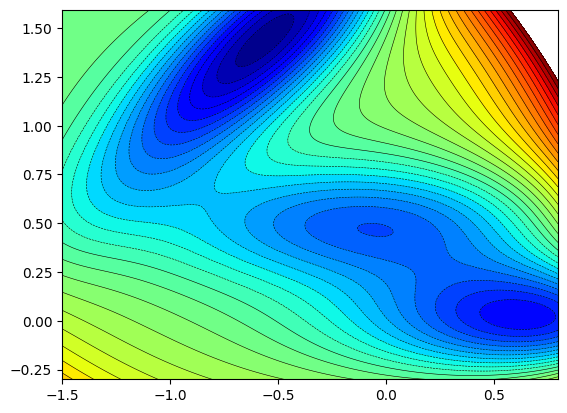

In [3]:

## calculate PES
MB = MullerBrownPotential()

x_min, x_max = -1.5, 0.8
y_min, y_max = -0.3, 1.6

xs = np.arange(x_min, x_max,  0.005)
ys = np.arange(y_min, y_max,  0.005)

x_mesh, y_mesh = np.meshgrid( xs, ys )

#x_mesh = np.flatten( x_mesh )
#y_mesh = np.flatten( y_mesh )
ene_mesh = MB.potential( np.array( [ x_mesh.flatten(), y_mesh.flatten() ] ).T )
#ene_mash = [ [ MB.potential( x, y ) for x in xs  ] for y in ys ]
#ene_mash = [ [ MB_potential( x, y ) for x in xs  ] for y in ys ]

#print( len( xs ) )
#print( len( ys ) )
#print( x_mesh.shape)
#print( y_mesh.shape)
#print( x_mesh.flatten().shape)
#print( y_mesh.flatten().shape)
#print( ene_mesh.shape)

levels = np.arange( -150, 200, 10)

## plot
fig, ax = plt.subplots()

mappable = ax.contourf(x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels , cmap="jet")
ax.contour(            x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels ,colors="k", linewidths=0.4)
#ax.contour(            x_mesh, y_mesh, ene_mesh,levels ,cmap="jet", linewidths=0.4)

plt.show()


optimization practice

[[ 0.62349941  0.02803776]
 [-0.05001082  0.4666941 ]
 [ 0.6234994   0.02803776]
 [ 0.6234994   0.02803776]
 [-0.55822363  1.44172585]
 [-0.05001082  0.4666941 ]
 [ 0.62349941  0.02803776]
 [ 0.6234994   0.02803776]
 [-0.55822363  1.44172584]
 [-0.05001082  0.4666941 ]]


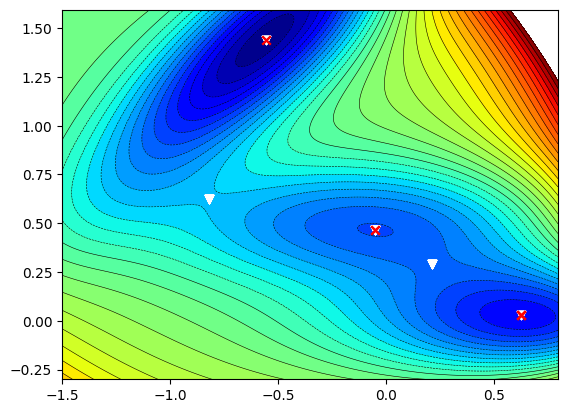

In [4]:
import random
from scipy import optimize

## minimize from random points
x_mins = []
for i in range(10) :

    x_rnd = random.uniform(x_min, x_max)
    y_rnd = random.uniform(y_min, y_max)

    result = optimize.minimize(lambda x: MB.potential(x), 
                              x0 = [x_rnd,y_rnd], 
                              method = 'BFGS',
                              jac = lambda x: MB.gradient(x) )

    #print( result )
    x_mins.append( result['x'])

x_mins = np.array( x_mins )

## stationary point optimization from random points
x_sps = []
for i in range(100) :

    x_rnd = random.uniform(x_min, x_max)
    y_rnd = random.uniform(y_min, y_max)

    result = optimize.root(lambda x: MB.gradient(x), 
                              x0 = [x_rnd,y_rnd] )


    if result['success'] :
        x_sps.append( result['x'])

x_mins = np.array( x_mins )
x_sps = np.array( x_sps )

## plot
fig, ax = plt.subplots()

mappable = ax.contourf(x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels , cmap="jet")
ax.contour(            x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels ,colors="k", linewidths=0.4)
ax.scatter(x_sps.T[0], x_sps.T[1], marker = 'v', color = 'w')
ax.scatter(x_mins.T[0], x_mins.T[1], marker = 'x', color = 'r')

print( x_mins )

plt.show()

## Ring-Polymer Potential

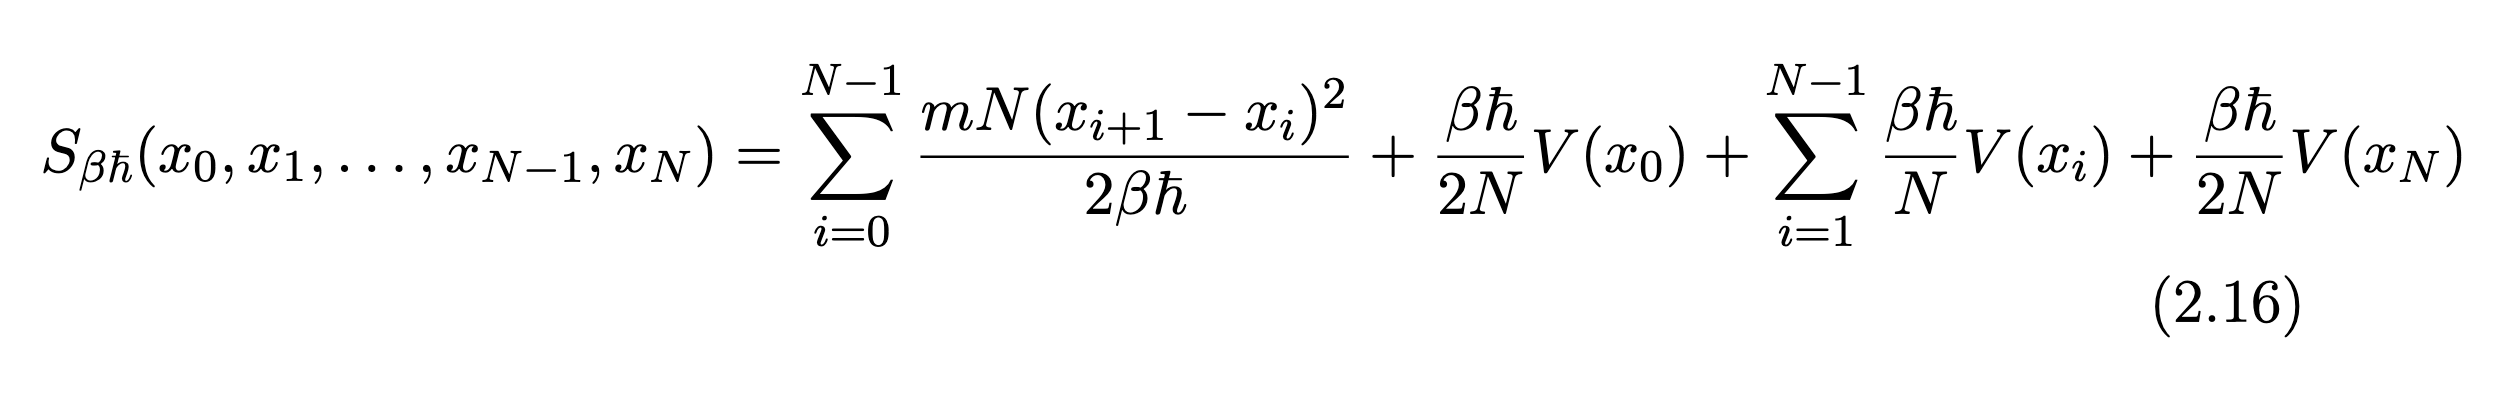


$$
S(x_0, x_1, \cdots, x_N) = \Sigma_{i=0}^{N-1} \frac{mN(x_{i+1}-x_i)^2}{2\beta\hbar} + \Sigma_{i=1}^{N-1} \frac{\beta\hbar}{N} V(x_i) + \frac{\beta\hbar}{2N} V(x_0) + \frac{\beta\hbar}{2N} V(x_N) \\
$$
if $x_0 = x_n$
$$
S(x_0, x_1, \cdots, x_N) = \Sigma_{i=0}^{N-1} \frac{mN(x_{i+1}-x_i)^2}{2\beta\hbar} + \Sigma_{i=0}^{N-1} \frac{\beta\hbar}{N} V(x_i)  \\
$$

$$
\frac{\partial S}{\partial x_i} = \frac{mN}{\beta\hbar}\{-(x_{i+1}-x_i) + (x_i - x_{i-1})\}  + \frac{\beta\hbar}{N} \nabla V(x_i) \\
                                = \frac{mN}{\beta\hbar}\{2x_i - (x_{i-1} + x_{i+1})\}  +  \frac{\beta\hbar}{N}\nabla V(x_i)
$$

$$
\frac{\partial^2 S}{\partial x_i x_j} = \left\{
\begin{array}{ll}
\frac{2mN}{\beta\hbar} + \frac{\beta\hbar}{N}\nabla^2V(x_i) & (j = i) \\
-\frac{mN}{\beta\hbar} & (j = i \pm 1) \\
\mathbf{0} & (\rm{others}) \\
\end{array}
\right.
$$

In [5]:
HBar = 1 ## in a.u.

class RingPolymerPotential :

    def __init__(self, potential_1bead, gradient_1bead, hessian_1bead, mass, beta, n_beads, flag_print_for_optimizer = False ) :

        self.potential_1bead = potential_1bead
        self.gradient_1bead  = gradient_1bead
        self.hessian_1bead   = hessian_1bead
        self.mass            = mass
        self.beta            = beta
        self.n_beads         = n_beads
        self.flag_print_for_optimizer = flag_print_for_optimizer

        pass

    def __print_for_optimizer(self, xs) :

        pass
        #print(f"in RingPolymerPotential: {#=:20.12f}")
        

    def potential( self, xs ) :

        ene = self._pot_spring_term(xs) + self._pot_average_term(xs)

        #print(f"in RingPolymerPotential: {ene=:20.12f}")

        return ene

    def gradient( self, xs ) :

        grad = np.zeros(xs.shape, dtype=float)

        xs_roll_m1 = np.roll( xs, -1, axis=0 )
        xs_roll_p1 = np.roll( xs, +1, axis=0 )

        #grads_each_bead = np.concatenate( [ self.gradient_1bead(x) for x in xs ], axis=0 )
        grads_each_bead = np.stack( [ self.gradient_1bead(x) for x in xs ] )

        return self.mass*self.n_beads/(self.beta*HBar)*(2*xs - (xs_roll_m1 + xs_roll_p1) ) \
        + self.beta*HBar*(grads_each_bead/self.n_beads)




    def hessian( self, xs ) :

        pass

    def _pot_spring_term( self, xs ) :

        xs_roll = np.roll( xs, 1, axis=0 )
        xs_diff = xs - xs_roll

        return 0.5*self.mass*self.n_beads/(self.beta*HBar)* \
                np.linalg.norm( xs_diff )**2

    def _pot_average_term( self, xs ) :

        enes = self.potential_1bead( xs )


        return self.beta*HBar*(sum(enes)/self.n_beads)


In [6]:
import matplotlib.pyplot as plt
import copy
from ipywidgets import interact

class Optimizer :

    def __init__(self, method='steepest-descent', dx = 5e-3, n_step = 1000, thresh = 1e-2) :

        self.method = method
        self.dx     = dx
        self.n_step = n_step
        self.thresh = thresh

    def minimize(self, func, f_grad, x0 ) :

        x = x0

        for i_step in range( self.n_step ) :

            grad = f_grad( x )
            if np.linalg.norm( grad ) < self.thresh  :
                break
            else :
                x -= self.dx*grad
                #print(x0, x)
                #print( f"{func(x)=:10.5f}, f{np.linalg.norm(grad)=:10.5f}")

        return x

class RPPWrapper :

    def __init__(self, ringpolypot ) :

        self.ringpolypot = ringpolypot
        self.xs_list     = []
        self.potentials  = []
        self.gradients   = []

    def potential(self, xs_flat ) :

        n_beads = int( len(xs_flat)/2 )
        xs = copy.deepcopy( xs_flat.reshape(n_beads,2) )

        self.xs_list.append( xs )
        potential = self.ringpolypot.potential(xs )
        self.potentials.append(potential)
        gradient = self.ringpolypot.gradient(xs )
        self.gradients.append(gradient)

        return potential

    def gradient(self, xs_flat ) :

        n_beads = int( len(xs_flat)/2 )
        #xs = xs_flat.reshape(n_beads,2)
        xs = copy.deepcopy( xs_flat.reshape(n_beads,2) )

        self.xs_list.append( xs )
        potential = self.ringpolypot.potential(xs )
        self.potentials.append(potential)
        gradient = self.ringpolypot.gradient(xs )
        self.gradients.append(gradient)

        return gradient.flatten()

        



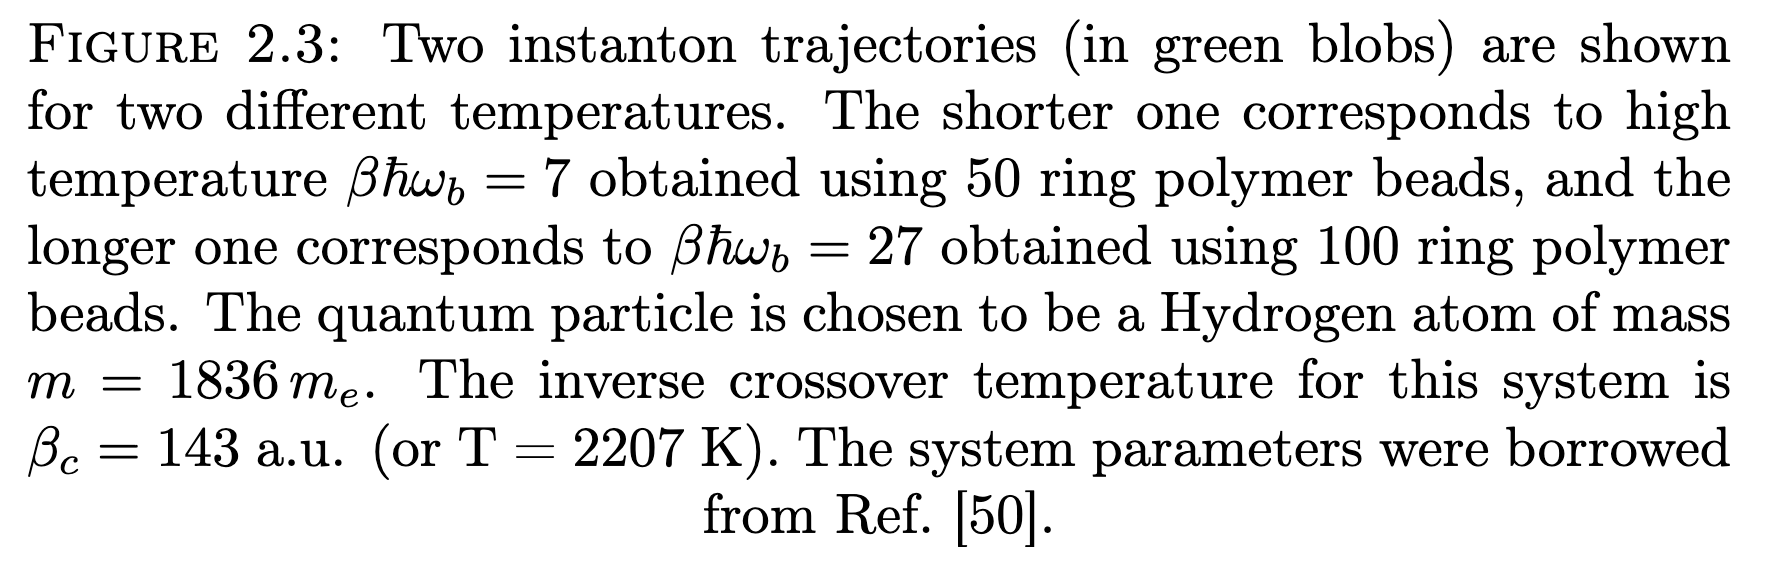

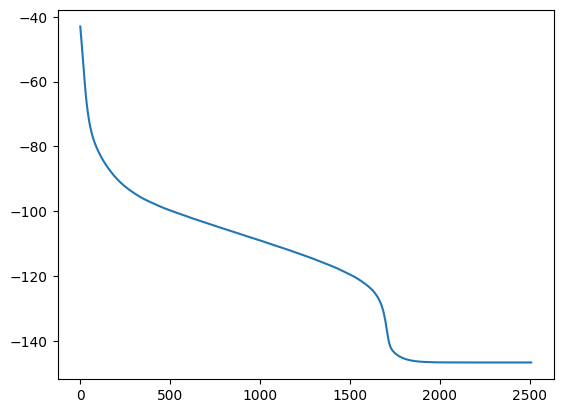

[np.float64(-42.96762950312036), np.float64(-43.590221803233554), np.float64(-44.22846799910007), np.float64(-44.88200962470108), np.float64(-45.55028433041509), np.float64(-46.232531149404444), np.float64(-46.927798355883844), np.float64(-47.63495478229068), np.float64(-48.352705027717775), np.float64(-49.07960859440924), np.float64(-49.81410263557877), np.float64(-50.554527697736475), np.float64(-51.299155608408874), np.float64(-52.046218507899994), np.float64(-52.79393795824155), np.float64(-53.540553082708826), np.float64(-54.28434678621471), np.float64(-55.02366926469724), np.float64(-55.75695820999173), np.float64(-56.48275533374555), np.float64(-57.19971904904175), np.float64(-57.90663334437814), np.float64(-58.602413049184015), np.float64(-59.28610581614591), np.float64(-59.95689123123194), np.float64(-60.614077509477085), np.float64(-61.257096248229324), np.float64(-61.885495696192635), np.float64(-62.49893296334772), np.float64(-63.097165550503185), np.float64(-63.68004252383

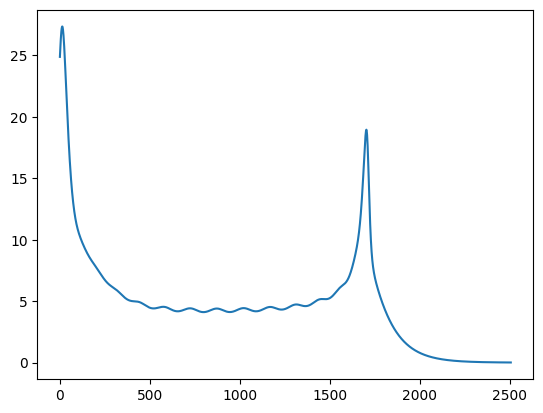

interactive(children=(IntSlider(value=1253, description='i_step', max=2507), Output()), _dom_classes=('widget-…

<function __main__.interactive_plot(i_step)>

In [7]:
#mass = 1836 ## me
#beta = 143  ## in atomic unit 
mass = 1 ## miyo param. me
beta = 1 ## miyo param. in atomic unit 
#beta = 10 ## miyo param. in atomic unit 
#n_beads = 50 ## or 100
n_beads = 50
#x_lft = np.array( [-0.05001082,  0.4666941 ] )
#x_cnt = np.array( [-0.55822363,  1.44172584])
#x_lft = np.array( [-0.8, 1.2  ] )
#x_cnt = np.array( [-0.4, 0.5  ] )
x_lft = np.array( [-0.5, 0.5  ] )
x_cnt = np.array( [-0.7, 1.0  ] )
delta = [ 0.0, 0.0 ]

xs_init = np.concatenate( [ np.linspace( x_cnt, x_lft - delta, int(n_beads/2) ),
                            np.linspace( x_lft, x_cnt + delta, int(n_beads/2) ) ] )
#xs_init = np.linspace( x_cnt, x_lft , int(n_beads) )
                            
## left min   [-0.55822363  1.44172584]
## center min [-0.05001082  0.4666941 ] 

## plot
#fig, ax = plt.subplots()
#
#mappable = ax.contourf(x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels , cmap="jet")
#ax.contour(            x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels ,colors="k", linewidths=0.4)
#ax.plot( xs_init[:,0], xs_init[:,1], marker='x', color='white',markersize = 5 )
#plt.show()

## prepare ringpolypot
ringpolypot = RingPolymerPotential(MB.potential, MB.gradient, MB.hessian, mass, beta, n_beads )
ringpolypot.potential( xs_init )
ringpolypot.gradient( xs_init )
wrapper_rpp = RPPWrapper( ringpolypot )

## optimization test
#result = optimize.root(lambda xs_flat: ringpolypot.gradient(xs_flat.reshape(n_beads,2)).flatten(), 
#                              x0 = xs_init.flatten(), options={"maxfev":1000000} )
#result = optimize.minimize(lambda xs_flat: np.linalg.norm( ringpolypot.gradient(xs_flat.reshape(n_beads,2)).flatten() ) **2.0, 
#                              x0 = xs_init.flatten() )
#result = optimize.minimize(fun = lambda xs_flat: ringpolypot.potential(xs_flat.reshape(n_beads,2)), 
#                           jac = lambda xs_flat: ringpolypot.gradient(xs_flat.reshape(n_beads,2)).flatten(),
#                              x0 = xs_init.flatten(), options={"maxiter":1e6} )

#print(f"{result['success']=}")
#print(result)
#xs_out = result['x'].reshape(n_beads,2)
#print( xs_out )
#print( ringpolypot.potential(xs_out) )

## steepest descent path
#xs_out  = myoptimizer.minimize(lambda xs_flat: ringpolypot.potential(xs_flat.reshape(n_beads,2)),
#                               lambda xs_flat: ringpolypot.gradient( xs_flat.reshape(n_beads,2)).flatten(),
#                               xs_init.flatten() )
#xs_out  = myoptimizer.minimize(ringpolypot.potential,
#                               ringpolypot.gradient,
#                               xs_init )
n_step = 4000
myoptimizer = Optimizer(dx=1e-3,n_step=n_step)
xs_out  = myoptimizer.minimize(wrapper_rpp.potential,
                               wrapper_rpp.gradient,
                               xs_init.flatten() ).reshape(n_beads,2)

xs
                               

## plot
#fig, ax = plt.subplots()
#mappable = ax.contourf(x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels , cmap="jet")
#ax.contour(            x_mesh, y_mesh, ene_mesh.reshape(len(ys), len(xs) ),levels ,colors="k", linewidths=0.4)
##ax.plot( xs_init[:,0], xs_init[:,1], marker='x', color='white',markersize = 5 )
#ax.plot( xs_out[:,0],  xs_out[:,1],  marker='x', color='white',markersize = 5 )
#plt.show()

## interactive plot
#plt.plot(wrapper_rpp.potentials)
#plt.show()
#print(wrapper_rpp.potentials)
#plt.plot(np.linalg.norm( np.linalg.norm( wrapper_rpp.gradients, axis=1), axis=1) )
#plt.show()
#interact( MullerBrownVisualizer(MB).plot_points, xs_inp = wrapper_rpp.xs_list )
#interact( MullerBrownVisualizer(MB).plot_points, xs_inp = [xs_out] )
#MullerBrownVisualizer(MB).plot_points(xs_out)
#MullerBrownVisualizer(MB).plot_points(wrapper_rpp.xs_list[0])
#for xs_i in wrapper_rpp.xs_list[::100] :
#    #print( xs.shape )
#    MullerBrownVisualizer(MB).plot_points(xs_i)

plt.plot(wrapper_rpp.potentials)
plt.show()
print(wrapper_rpp.potentials)
plt.plot(np.linalg.norm( np.linalg.norm( wrapper_rpp.gradients, axis=1), axis=1) )
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
 
def interactive_plot(i_step):
    MullerBrownVisualizer(MB).plot_points(wrapper_rpp.xs_list[i_step])
interact(interactive_plot, i_step=(0, len(wrapper_rpp.xs_list) - 1,))


 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [-1.352e-02 -1.354e-02 ... -1.352e-02 -1.354e-02]
       x: [-5.617e-01  1.438e+00 ... -5.617e-01  1.438e+00]
  method: hybr
    nfev: 323
    fjac: [[-8.763e-01  2.213e-01 ...  3.026e-01 -1.454e-12]
           [-1.286e-01 -8.575e-01 ...  1.274e-01  3.285e-01]
           ...
           [-2.336e-01  1.498e-01 ... -7.001e-01  5.745e-01]
           [ 2.243e-01  2.872e-01 ...  2.778e-01  4.865e-01]]
       r: [-1.652e+02  6.406e+01 ...  9.375e+01  3.152e+01]
     qtf: [ 4.095e-04  6.170e-04 ... -2.875e-01  1.760e+00]


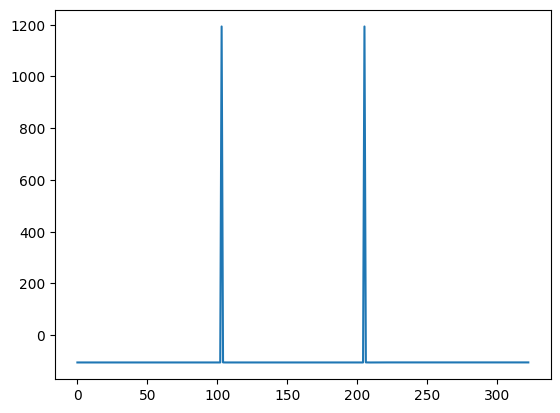

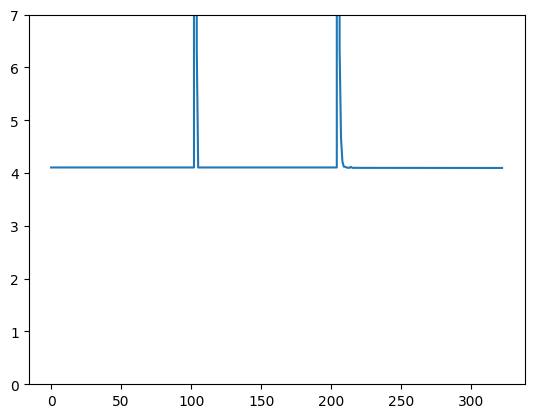

interactive(children=(IntSlider(value=161, description='i_step', max=322), Output()), _dom_classes=('widget-in…

<function __main__.interactive_plot(i_step)>

In [17]:
#xs_near_saddle = wrapper_rpp.xs_list[1000]
xs_near_saddle = wrapper_rpp.xs_list[800]

wrapper_rpp_saddle = RPPWrapper( ringpolypot )
#result = optimize.minimize(lambda xs_flat: np.linalg.norm( wrapper_rpp_saddle.gradient(xs_flat) ) **2.0, 
#                              x0 = xs_near_saddle.flatten() )
result = optimize.root( wrapper_rpp_saddle.gradient, x0 = xs_near_saddle.flatten(),
#result = optimize.root( lambda xs_flat: np.linalg.norm(wrapper_rpp_saddle.gradient(xs_flat)), x0 = xs_near_saddle.flatten(),
                    # method="broyden1", options={"maxiter":10000} )
                    # method="lm", options={"maxiter":10000, } )
                     options={"maxfev":1000000, "xtol":1e-5} )

print( result )

plt.plot(wrapper_rpp_saddle.potentials)
plt.show()
plt.plot(np.linalg.norm( np.linalg.norm( wrapper_rpp_saddle.gradients, axis=1), axis=1) )
plt.ylim(0,7)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
 
def interactive_plot(i_step):
    MullerBrownVisualizer(MB).plot_points(wrapper_rpp_saddle.xs_list[i_step])
interact(interactive_plot, i_step=(0, len(wrapper_rpp_saddle.xs_list) - 1,))


Check the RingPolymerPotential roll

In [9]:
#enes = []
#grad_norms = []
#for i in range(n_beads) :
#    xs_roll = np.roll( xs_init, i, axis=0 )
#    ene = ringpolypot.potential(xs_roll)
#    grad_norm = np.linalg.norm( ringpolypot.gradient(xs_roll) )
#
#    enes.append( ene )
#    grad_norms.append( grad_norm )
#
#
#plt.plot( range(n_beads ), grad_norms )
#plt.show()
#plt.plot( range(n_beads ), enes )
#plt.show()

Check the numerical gradient and Analytical gradient

In [10]:
#import copy
### numerical gradient
#class NumericalGradient :
#
#    def __init__(self, func, dx = 1e-4) :
#
#        self.func = func
#        self.dx = dx
#
#    def gradient(self, x ) :
#
#        n = len(x)
#        grad = np.zeros(n,dtype=float)
#
#        for i in range(n) :
#
#            x_m = copy.deepcopy( x )
#            x_p = copy.deepcopy( x )
#            x_m[i] -= self.dx
#            x_p[i] += self.dx
#
#            grad[i] = (self.func(x_p) - self.func(x_m))/(2*self.dx)
#
#        return grad
#
### test for numerical gradient
#numgrad_harm = NumericalGradient(func=lambda x: 0.50*x[0]**2.0 + 0.5*x[1]**2.0 )
#print( numgrad_harm.gradient( [1,1] ) )
#
### analytical gradeint
#grad_anal = ringpolypot.gradient(xs_init)
#
### numerical gradient
#numgrad_rpp = NumericalGradient(lambda x: ringpolypot.potential(x.reshape(n_beads,2)), 1e-8)
#grad_numr = numgrad_rpp.gradient(xs_init.flatten()).reshape(n_beads,2)
#
#
#print( np.linalg.norm( grad_anal - grad_numr ) )
#
#
#
#